# Analisis general: Esculturas publicas de Medellín
## Exploración bivariable

### Importar librerias

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
colors = ['#1D1B1D', '#3B393B', '#605A39', '#7A6E45', '#9F8A6A', '#C6A078', '#B65022', '#D47138', '#F2E3C6', '#F5E1B0', '#F4F4F4', '#E0E0E0', '#2F2B2F', '#D9C6AD', '#987E5A']
sns.set_palette(sns.color_palette(colors))

import folium
from folium.plugins import HeatMap

import warnings
warnings.filterwarnings('ignore')

/Users/laasanchezgi/Documents/laasanchezgi/pm/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


### Importar datos

In [2]:
df = pd.read_csv('../data/esculturas-publicas-medellin-limpio.csv')
df.head()

,codigo-area,area,name,general-direction,type,year,author,latitude,longitude
0,3,manrique,carlos gardel,carrera 45 con calle 73,escultura,1968,alfonso goez,6.269014,-75.554733
1,3,manrique,jorge eliecer gaitan ayala,carrera 37 con calle 69,escultura,2004,rodolfo montoya,6.265313,-75.548335
2,4,aranjuez,talentos en libertad,carrera 48 con calle 93,escultura,2003,luz maria piedrahita,6.285199,-75.556308
3,4,aranjuez,antonio nariño,carrera 50 con calle 90,escultura,1962,alfonso goez,6.282458,-75.561160
4,4,aranjuez,cristo,carrera 50 con calle 90,escultura,1983,josue giraldo,6.282358,-75.561155


### Mapa de calor de las esculturas publicas de Medellín

In [16]:
# Crear un objeto de mapa centrado en la ubicación promedio
map_center = [6.23,-75.57]
heat_map = folium.Map(location=map_center, zoom_start=13)

# Preparar los datos para el mapa de calor
heat_data = [[row['latitude'], row['longitude']] for index, row in df.iterrows()]

# Añadir el mapa de calor
HeatMap(heat_data).add_to(heat_map)

# Guardar el mapa en un archivo HTML
heat_map.save('../reports/maps/heatmap.html')

# Mostrar el mapa
heat_map

El mapa muestra la concetración de obras en la zona central de Medellín especificamente en la comunas de La Candelaria y Belen.

### Tipos de esculturas por comunas

In [3]:
a1 = df.groupby(['area','type']).size().unstack()
a1 = a1.fillna(0)
a1 = a1.sort_values(by='escultura', ascending=False)
a1

type,busto,escultura,escultura abstracta,fuente,placa
area,,,,,
la candelaria,42.0,45.0,2.0,4.0,1.0
santa elena,0.0,6.0,0.0,0.0,0.0
belen,4.0,5.0,10.0,1.0,0.0
poblado,0.0,5.0,0.0,0.0,0.0
aranjuez,0.0,4.0,1.0,0.0,0.0
san cristobal,0.0,3.0,0.0,0.0,0.0
castilla,0.0,2.0,0.0,0.0,0.0
laureles-estadio,2.0,2.0,3.0,0.0,0.0
manrique,0.0,2.0,0.0,0.0,0.0


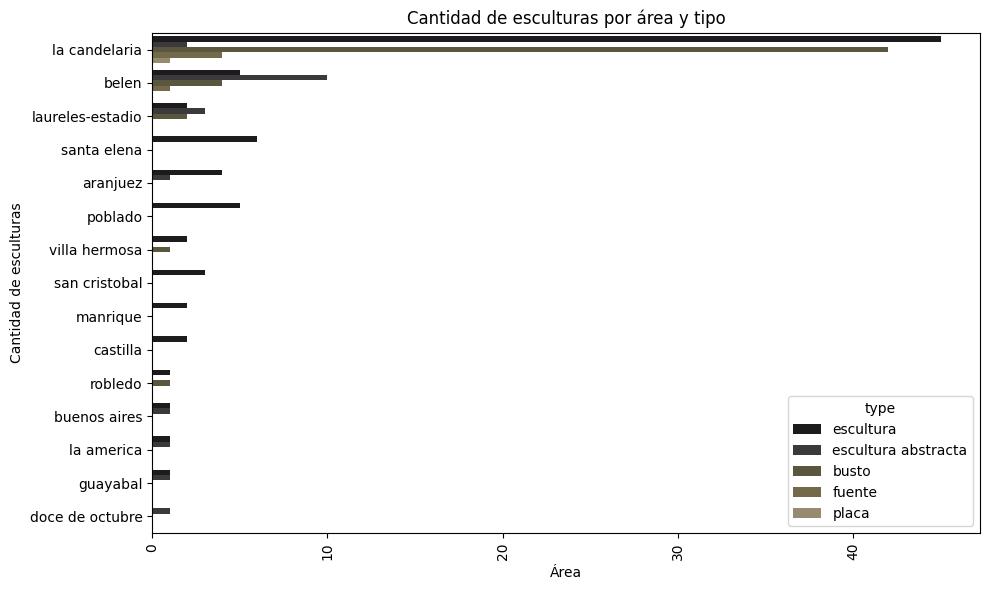

In [4]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, y='area', hue='type' ,order=df['area'].value_counts().index, palette=colors)
plt.title('Cantidad de esculturas por área y tipo')
plt.xlabel('Área')
plt.ylabel('Cantidad de esculturas')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### Esculturas en la Comuna de Belen

In [5]:
df_belen = df[df['area'] == 'belen']
df_belen

,codigo-area,area,name,general-direction,type,year,author,latitude,longitude
42,16,belen,la medicina y la salud,"clinica de las americas, avenida 80",fuente,1997,rodrigo arenas betancourt,6.214021,-75.596433
43,16,belen,homenaje a carlos gardel,plazoleta aeropuerto olaya herrera,escultura,2003,salvador arango,6.217427,-75.587389
44,16,belen,signo para medellin,carrera 70 con calle 11,escultura abstracta,1997,otto herbert hajek,6.221331,-75.592054
45,16,belen,simon bolivar - parque de belen,calle 30a con carrera 76,busto,1930,josue giraldo,6.232526,-75.596687
46,16,belen,venus fragmentandose en medellin con platanillos,calle 30 con carrera 83,escultura,1997,marta minujin,6.230657,-75.607461
47,16,belen,andres escobar,calle 30 con carrera 66b,busto,2012,carlos mario velez,6.234617,-75.588272
48,16,belen,andres escobar,carrera 66b con calle 32,escultura,2000,alejandro hernandez,6.234572,-75.587346
49,16,belen,signo aleteando el espacio,cerro nutibara,escultura abstracta,1988,otto herbert hajek,6.237278,-75.581611
50,16,belen,torre,cerro nutibara,escultura abstracta,1983,edgar negret,6.236921,-75.580509
51,16,belen,estructura cromovegetal,cerro nutibara,escultura abstracta,1983,carlos cruz diez,6.236599,-75.581140


#### Esculturas por dirección general y tipo

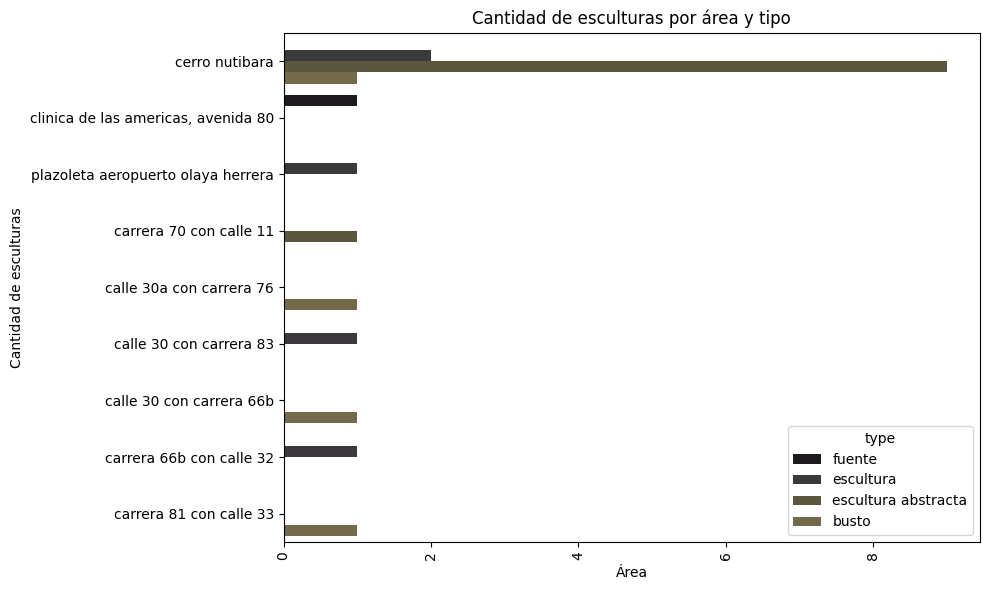

In [6]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df_belen, y='general-direction', hue='type' ,order=df_belen['general-direction'].value_counts().index, palette=colors)
plt.title('Cantidad de esculturas por dirección general y tipo')
plt.xlabel('Área')
plt.ylabel('Cantidad de esculturas')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

En Belen, especificamente en el Cerro Nutibara predominan las obras de tipo escultura abstracta.

In [24]:
df_belen_cn = df_belen[df_belen['general-direction'] == 'cerro nutibara']
df_belen_cn.reset_index(drop=True, inplace=True)
df_belen_cn.sort_values(by='name', inplace=True)
df_belen_cn

,codigo-area,area,name,general-direction,type,year,author,latitude,longitude
7,16,belen,cacique nutibara - cerro nutibara,cerro nutibara,escultura,1955,jose horacio betancur,6.236247,-75.580061
8,16,belen,construccion,cerro nutibara,escultura abstracta,1983,manuel felguerez,6.236909,-75.580389
9,16,belen,construccion,cerro nutibara,escultura abstracta,1983,john castles,6.236852,-75.579803
2,16,belen,estructura cromovegetal,cerro nutibara,escultura abstracta,1983,carlos cruz diez,6.236599,-75.581140
5,16,belen,guillermo zuluaga - montecristo,cerro nutibara,escultura,2000,luz maria piedrahita,6.235982,-75.580368
4,16,belen,porticos,cerro nutibara,escultura abstracta,1983,alberto uribe duque,6.236236,-75.580600
0,16,belen,signo aleteando el espacio,cerro nutibara,escultura abstracta,1988,otto herbert hajek,6.237278,-75.581611
3,16,belen,sin titulo,cerro nutibara,escultura abstracta,1983,carlos rojas,6.236206,-75.581944
10,16,belen,sin titulo,cerro nutibara,escultura abstracta,1983,sergio de camargo,6.236968,-75.579813
11,16,belen,sin titulo,cerro nutibara,escultura abstracta,1983,julio le parc,6.237197,-75.580086


De las 12 obras que existen en el cerro nutibara 9 son abstractas.

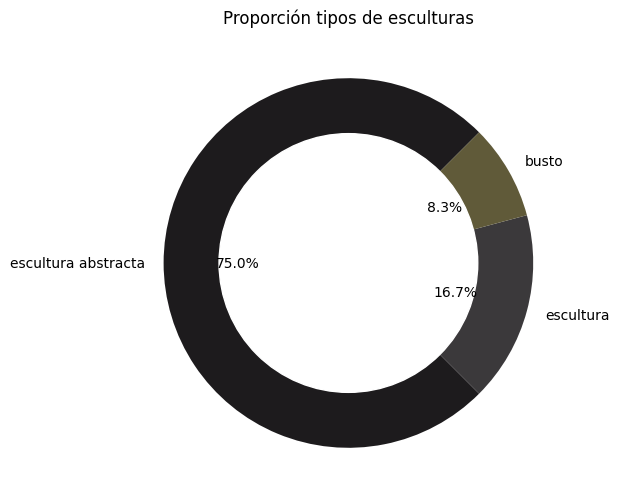

In [8]:
plt.figure(figsize=(10, 6))
circulo = plt.Circle((0, 0), 0.7, color='white')
plt.pie(df_belen_cn['type'].value_counts(), labels=df_belen_cn['type'].value_counts().index, autopct='%1.1f%%', startangle=45, colors=colors)
p = plt.gcf()
p.gca().add_artist(circulo)
plt.title('Proporción tipos de esculturas')
plt.show()

In [18]:
a1 = df_belen_cn.groupby('type').agg({'type': 'count'}).rename(columns={'type': 'cantidad-esculturas'}).sort_values(by='cantidad-esculturas', ascending=False).reset_index()
a1['%'] = (a1['cantidad-esculturas'] / a1['cantidad-esculturas'].sum()).map('{:.1%}'.format)
a1['%-acum'] = (a1['cantidad-esculturas'].cumsum() / a1['cantidad-esculturas'].sum()).map('{:.1%}'.format)
a1

,type,cantidad-esculturas,%,%-acum
0,escultura abstracta,9,75.0%,75.0%
1,escultura,2,16.7%,91.7%
2,busto,1,8.3%,100.0%


#### Evolución en el tiempo de las esculturas en el cerro Nutibara

Cantidad de esculturas realizadas por año

In [19]:
a2 = df_belen_cn.groupby('year').agg({'year': 'count'}).rename(columns={'year': 'cantidad-esculturas'}).sort_values(by='cantidad-esculturas', ascending=False).reset_index()
a2['%'] = (a2['cantidad-esculturas'] / a2['cantidad-esculturas'].sum()).map('{:.1%}'.format)
a2['%-acum'] = (a2['cantidad-esculturas'].cumsum() / a2['cantidad-esculturas'].sum()).map('{:.1%}'.format)
a2.head(10)

,year,cantidad-esculturas,%,%-acum
0,1983,8,66.7%,66.7%
1,1955,1,8.3%,75.0%
2,1978,1,8.3%,83.3%
3,1988,1,8.3%,91.7%
4,2000,1,8.3%,100.0%


Entendiendo la evolución de las esculturas en el tiempo

In [ ]:
# Conteo de esculturas por año
esculturas_per_year = df_belen_cn['year'].value_counts().sort_index()

# Crear un rango de años desde el minumo hasta el máximo
min_year = esculturas_per_year.index.min()
max_year = esculturas_per_year.index.max()
years = pd.Series(0, index=range(min_year, max_year + 1))

# Combinar las cuentas con todos los años
esculturas_completas = years.add(esculturas_per_year, fill_value=0).astype(int).reset_index()
esculturas_completas.columns = ['year', 'cantidad-esculturas']

esculturas_completas.head()

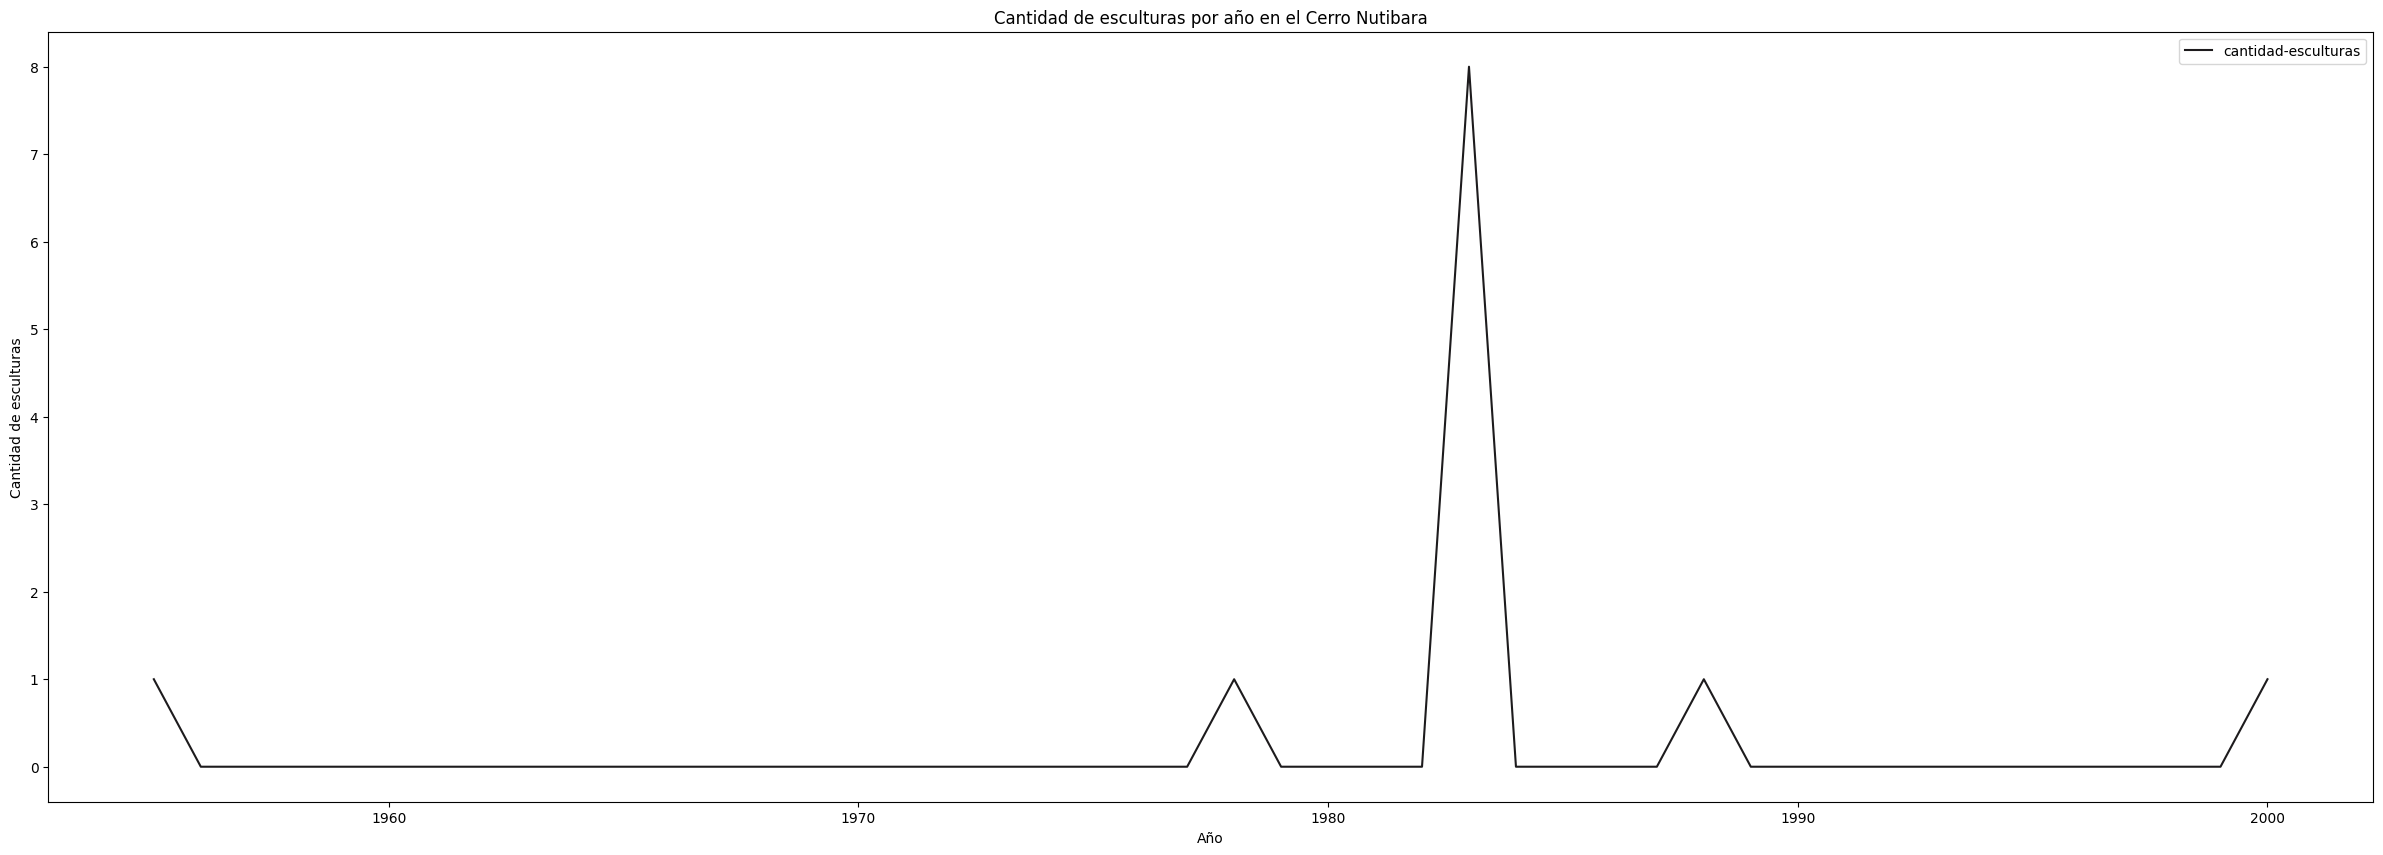

In [10]:
esculturas_completas.plot(y='cantidad-esculturas', x='year', kind='line', figsize=(30, 10), color=colors[0])
plt.title('Cantidad de esculturas por año en el Cerro Nutibara')
plt.xlabel('Año')
plt.ylabel('Cantidad de esculturas')
plt.show()

#### Artistas en el cerro Nutibara

Es una obra por artista

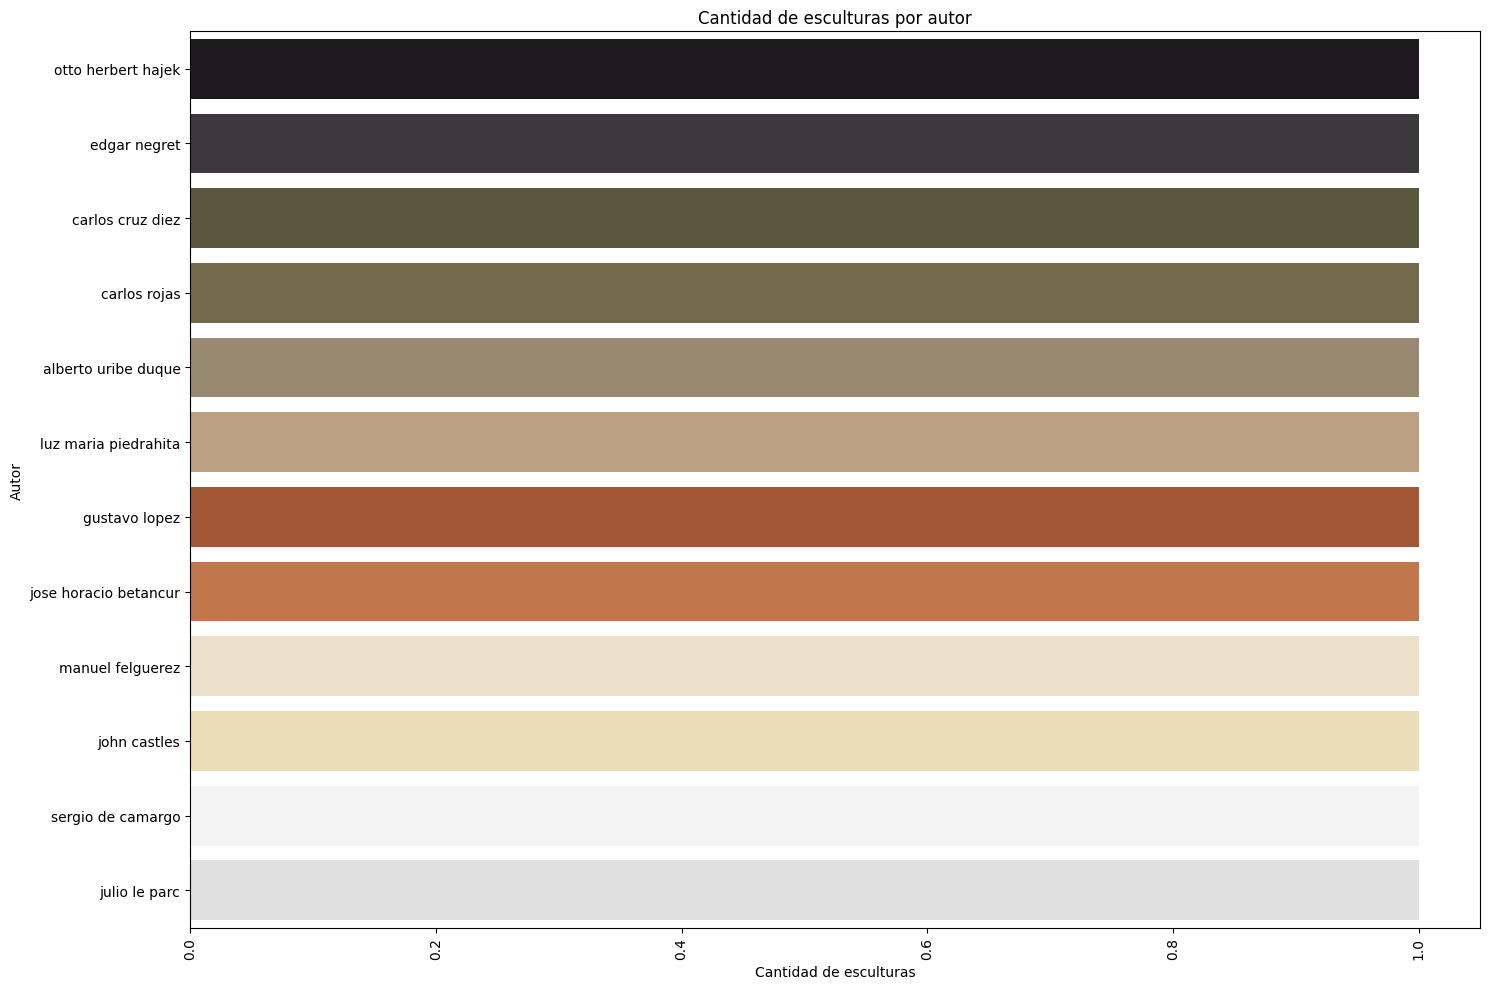

In [21]:
plt.figure(figsize=(15, 10))
sns.countplot(y='author', data=df_belen_cn, order=df_belen_cn['author'].value_counts().index, palette=colors)
plt.title('Cantidad de esculturas por autor')
plt.ylabel('Autor')
plt.xlabel('Cantidad de esculturas')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()